## Dependencias

In [67]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs,load_iris

from sklearn.linear_model import Perceptron,PassiveAggressiveClassifier
from sklearn.svm import SVC 

from sklearn.model_selection import train_test_split,GridSearchCV  
from sklearn.metrics import accuracy_score,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

cf.go_offline()

## Datos Sintéticos

In [68]:
X,y = make_blobs(n_samples=1000,centers=2,random_state=0,cluster_std=10)

## Partición

In [69]:
Xt,Xv,yt,yv = train_test_split(X,y,test_size=0.3)

In [70]:
Xt.shape,Xv.shape,yt.shape,yv.shape

((700, 2), (300, 2), (700,), (300,))

## Aprendizaje

### Perceptrón

In [71]:
per = Perceptron()
per.fit(Xt,yt)

Perceptron()

#### Vector de parámetros $\vec{\theta}$ y sesgo ${\theta_0}$

In [72]:
per.coef_,per.intercept_

(array([[6.39921512, 4.32395498]]), array([-7.]))

In [73]:
def dibujarClasificador(X,y,clf):
    plt.figure(figsize=(5,5))
    # Crear un gráfico de dispersión de los datos
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

    # Crear los límites del gráfico
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    # Crear una cuadrícula para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 10)
    yy = np.linspace(ylim[0], ylim[1], 10)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Entrenar el modelo

    # Crear la línea de decisión
    Z = clf.decision_function(xy).reshape(XX.shape)
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    # Mostrar el gráfico
    plt.show()


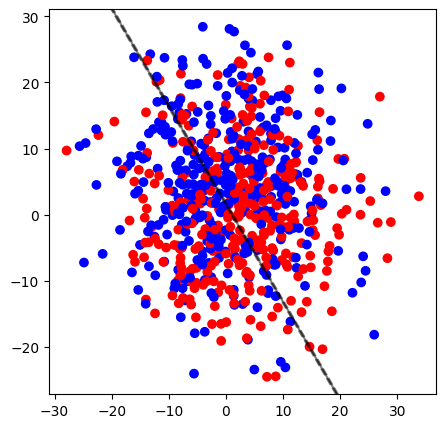

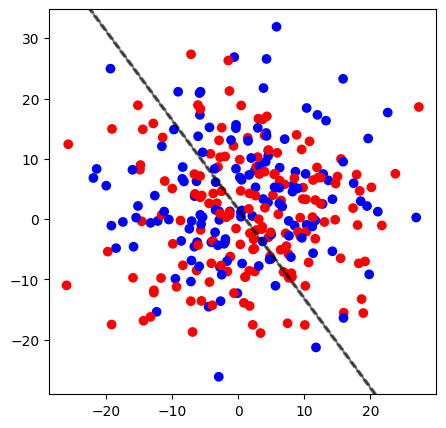

In [74]:
dibujarClasificador(Xt,yt,per)
dibujarClasificador(Xv,yv,per)

In [75]:
accuracy_score(yt,per.predict(Xt)),accuracy_score(yv,per.predict(Xv))

(0.5157142857142857, 0.5)

In [76]:
confusion_matrix(yt,per.predict(Xt)),confusion_matrix(yv,per.predict(Xv))

(array([[163, 199],
        [140, 198]]),
 array([[61, 77],
        [73, 89]]))

## Pasivo-Agresivo

In [77]:
pa = PassiveAggressiveClassifier(C=4)
pa.fit(Xt,yt)

PassiveAggressiveClassifier(C=4)

#### Vector de parámetros $\vec{\theta}$ y sesgo ${\theta_0}$

In [78]:
pa.coef_,pa.intercept_

(array([[0.53082313, 0.67877584]]), array([1.09052516]))

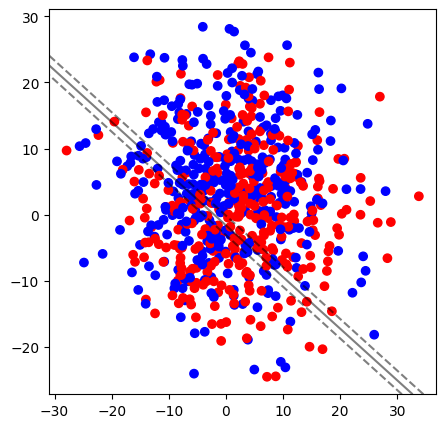

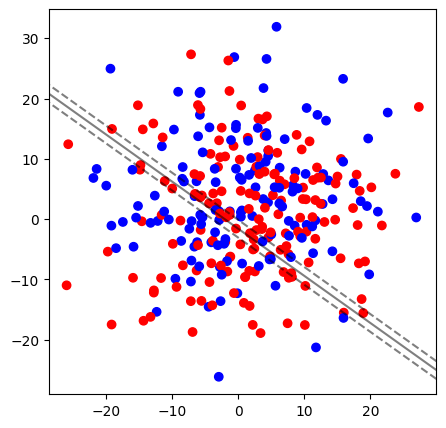

In [79]:
dibujarClasificador(Xt,yt,pa)
dibujarClasificador(Xv,yv,pa)

In [80]:
accuracy_score(yt,pa.predict(Xt)),accuracy_score(yv,pa.predict(Xv))

(0.47285714285714286, 0.5133333333333333)

In [81]:
confusion_matrix(yt,pa.predict(Xt)),confusion_matrix(yv,pa.predict(Xv))

(array([[118, 244],
        [125, 213]]),
 array([[ 49,  89],
        [ 57, 105]]))